In [1]:
import numpy as np
import random
import torch

import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision.utils import make_grid, save_image

import json

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

# from utils import visualize_cam, Normalize, load_image, plot_gradcam, get_gradcam
# from gradcam import GradCAM, GradCAMpp

from attn_model import *

import matplotlib.pyplot as plt

from helpers import *
# from utils import *

from utils import *

In [2]:
image_names = get_png_names("../pooling/data/MEX2/")#[0:25]
y = get_migrants("../pooling/data/migration_data.json" , image_names)

1779 municipalities.


In [3]:
# input = load_inputs(image_names[0]).to(device)
# output = torch.tensor([y[0]]).to(device)

In [95]:
def calc_loss_thresholds(loss):
    breaks = loss / 7
    breaks = [(i * breaks).item() for i in range(7)]
    return breaks


def clip_arr(arr, new_dims, point):
        
    og_size = arr.shape
    
#     print(og_size)
    
    m_left = og_size[0] / 2
    m_right = og_size[0] / 2
    
    m_up = og_size[1] / 2
    m_down = og_size[1] / 2  
    
#     print(m_left, m_right)
#     print(m_up, m_down)
    
    if point[0] < m_left:
        row_indices = (0, new_dims[0])
#         print(row_indices)
    elif point[0] > m_right:
        row_indices = (new_dims[0], og_size[0])
#         print(row_indices)    
    else:
        row_indices = (point[0] + m_left, point[0] + m_right)
        

        
    if point[1] < m_up:
        col_indices = (0, new_dims[1])
#         print(col_indices)  
    elif point[1] > m_down:
        col_indices = (new_dims[1], og_size[1])
#         print(col_indices)    
    else:
        col_indices = (point[1] + m_up, point[1] + m_down)   

    return row_indices[0], row_indices[1], col_indices[0], col_indices[1]
        
        
        
# bean = clip_arr(test_arr, new_dims, result)

In [100]:
def clip_input(input, test_arr):
    result = np.where(test_arr == np.max(test_arr))
    sh = test_arr.shape
    sh = (int(sh[0] * .70), int(sh[1] * .70))
    
    left = sh[0]
    right = sh[1]
    ni, nj = test_arr.shape 
    new_value = 255

    min_row, max_row = 50000, 0
    min_col, max_col = 50000, 0


    for i, j in zip(result[0], result[1]):
        istart, istop = max(0, i-left), min(ni, i+left+1)
        jstart, jstop = max(0, j-right), min(nj, j+right+1)
        test_arr[istart:istop, jstart:jstop] = new_value

        if istart < min_row:
            min_row = istart
        if jstart < min_col:
            min_col = jstart   
        if istop > max_row:
            max_row = istop    
        if jstop > max_col:
            max_col = jstop  
            
            
#     print(min_row, max_row)
#     print(min_col, max_col)
            
            
    input = input.detach().cpu()[:, :, min_row:max_row, min_col:max_col]
    
    return input

In [101]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = models.resnet18().to(device)
model = attnNetBinary(in_channels = 512, h = 7, w = 7, batch_size = 1, resnet = resnet18).to(device)
lr = .0001
criterion = torch.nn.L1Loss(reduction = 'mean')
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [102]:


# # input = load_inputs(image_names[7]).to(device)
# input = load_inputs(image_names[0]).to(device)
# output = torch.tensor([y[7]]).to(device)

# for i in range(20):
    
#     print("Epoch: ", i)
    
    
#     model.train()
#     y_pred = model(input)    
#     loss = criterion(y_pred, output)
#     print("  Loss: ", loss.item())
    
#     IM_SIZE = (input.shape[2], input.shape[3])
#     model.eval()
#     test_ims, test_arr = get_gradcam(model, IM_SIZE, input.cuda())   
#     plot_gradcam(test_ims)
#     plt.savefig(f"./test{i}.png")
    

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
    
#     if i % 5 == 0:
#         input = clip_input(input, test_arr).to(device)
#         print("New image shape: ", input.shape)
        

Epoch:  0
  Loss:  954.98095703125
  Loss thresholds based of baseline loss:  [0.0, 136.4258575439453, 272.8517150878906, 409.277587890625, 545.7034301757812, 682.1292724609375, 818.55517578125]


Epoch:  1
  Loss:  952.8397827148438


Epoch:  2
  Loss:  946.0325927734375


Epoch:  3
  Loss:  932.7073364257812


Epoch:  4
  Loss:  910.0425415039062


Epoch:  5
  Loss:  874.9337158203125


Epoch:  6
  Loss:  823.1324462890625


Epoch:  7
  Loss:  749.2090454101562
  Moving to threshold:  5   |  Next loss benchmark:  682.1292724609375
New image shape:  torch.Size([1, 3, 1012, 1923])


Epoch:  8
  Loss:  835.338134765625


Epoch:  9
  Loss:  761.0531616210938


Epoch:  10
  Loss:  650.33447265625
  Moving to threshold:  4   |  Next loss benchmark:  545.7034301757812
New image shape:  torch.Size([1, 3, 724, 1362])


Epoch:  11
  Loss:  641.4080810546875


Epoch:  12
  Loss:  452.7245788574219
  Moving to threshold:  3   |  Next loss benchmark:  409.277587890625
New image shape:  torch.Size

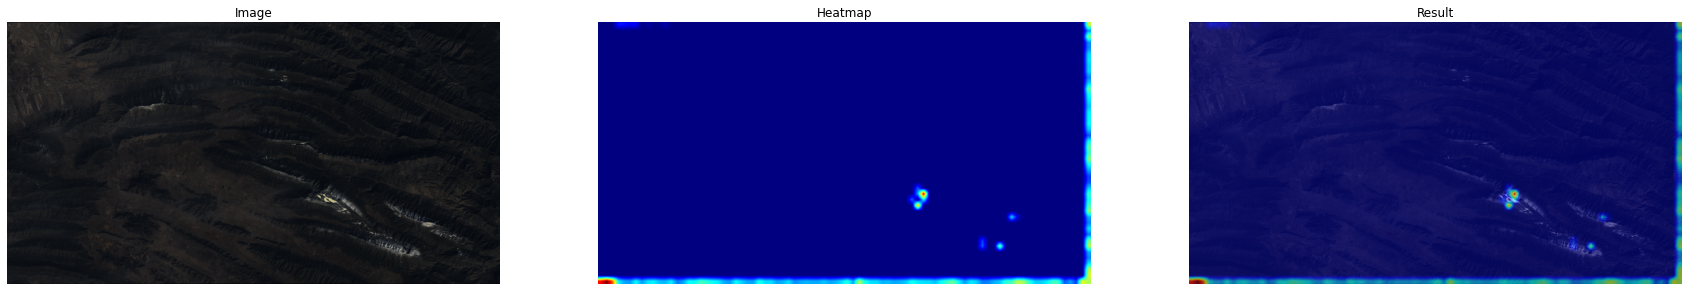

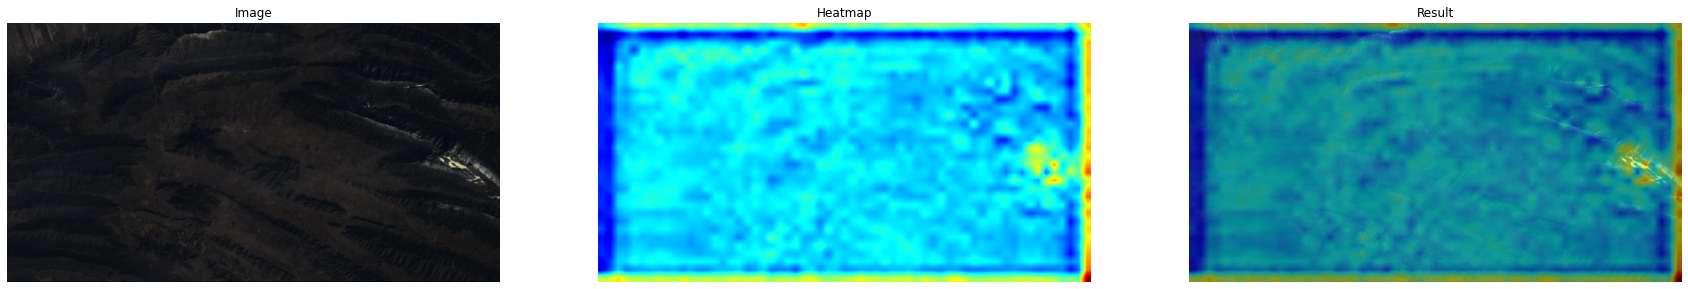

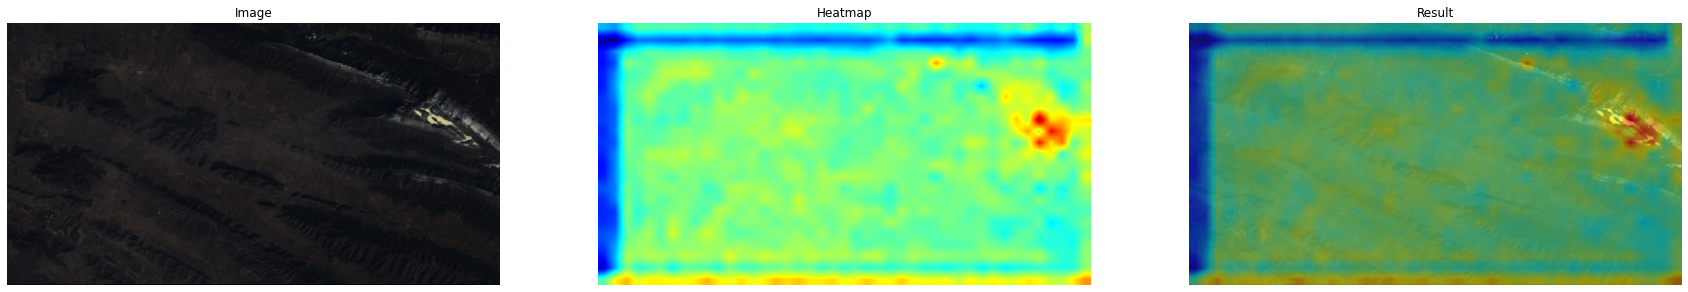

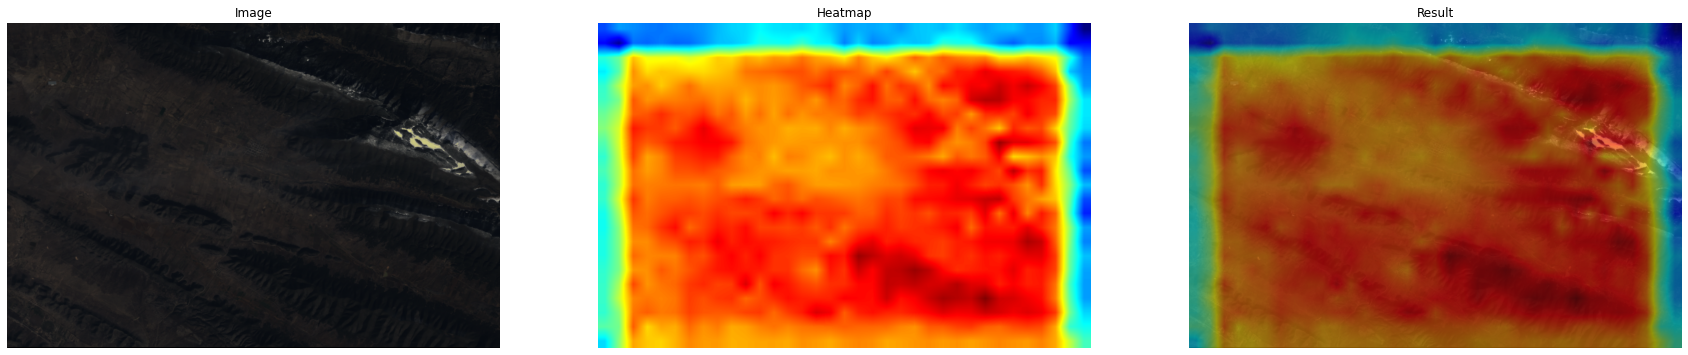

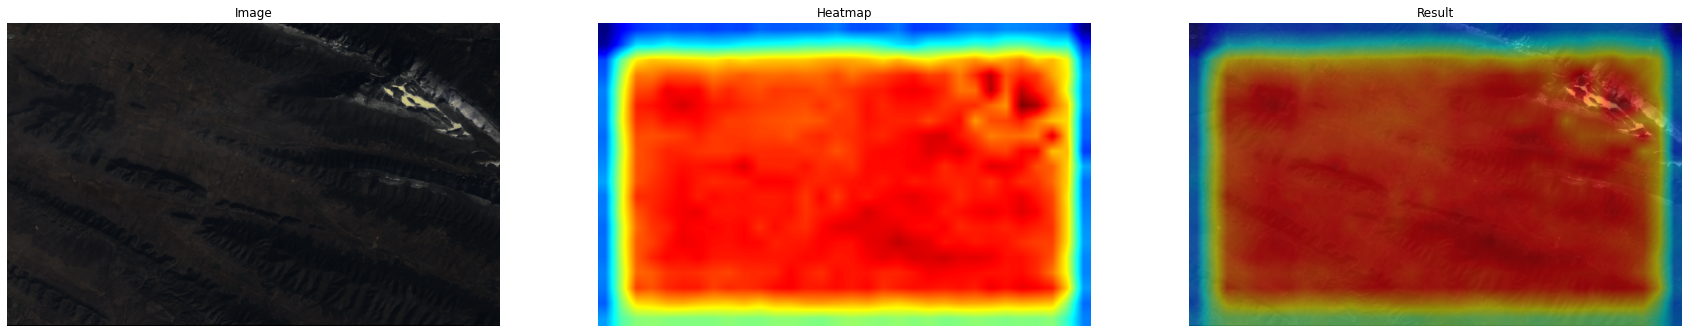

In [103]:
IMAGE_INDEX = 7

input = load_inputs(image_names[IMAGE_INDEX]).to(device)
output = torch.tensor([y[IMAGE_INDEX]]).to(device)

for i in range(50):
        
    print("Epoch: ", i)
    
    
    model.train()
    y_pred = model(input)    
    loss = criterion(y_pred, output)
    print("  Loss: ", loss.item())
    
    
    IM_SIZE = (input.shape[2], input.shape[3])
    model.eval()
    test_ims, test_arr = get_gradcam(model, IM_SIZE, input.cuda())   

    
    
    # After the first epoch...
    if i == 0:
        
        # Calculate 0, 20, 40, 60, & 80 percent loss thresholds
        loss_thresholds = calc_loss_thresholds(loss)
        threshold_index = 6
        cur_threshold = loss_thresholds[threshold_index]
        
        print("  Loss thresholds based of baseline loss: ", loss_thresholds)
                
    
        
    # If the loss falls below the current threshold
    if loss.item() < cur_threshold:
                
        # Set the new threshold
        threshold_index -= 1
        cur_threshold = loss_thresholds[threshold_index]
        print("  Moving to threshold: ", threshold_index, "  |  Next loss benchmark: ", cur_threshold)
        input = clip_input(input, test_arr).to(device)
        print("New image shape: ", input.shape)
        
        plot_gradcam(test_ims)
        plt.savefig(f"./test{i}_imgshape{input.shape}_img{IMAGE_INDEX}.png")
    
        if threshold_index == 1:
            
            break
            
    print("\n")


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

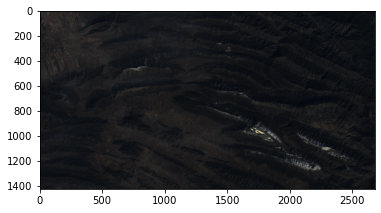

In [10]:
hm = load_inputs(image_names[7])#.to(device)
plt.imshow(hm[0].permute(1,2,0))

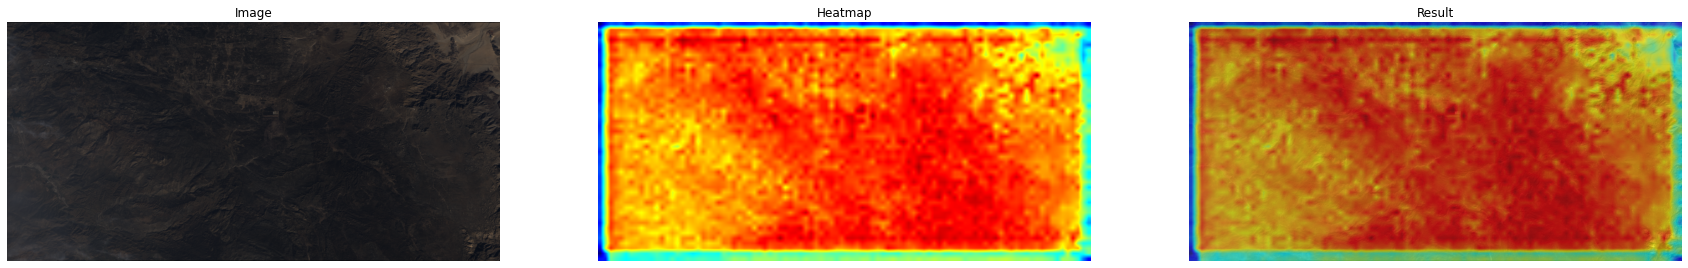

In [10]:
plot_gradcam(test_ims)
plt.savefig("./test.png")